2) Perform the 5 data visualization tasks (given below) on the student performance dataset given in the
link below. Each figure: 800×600 px, 300 DPI, title, labeled axes/units, legend if applicable, readable
ticks. For each, add a 5–8 sentence interpretation to reports. Before the visualizations
(analysis step) you need to perform ingestion stage and preprocessing step
(missing values etc.) (10 points).
A. V1 — Gender boxplots (math vs reading) (2 pts)
a. Question: Are there gender differences in math vs reading?
b. Chart: Side‑by‑side boxplots of math score and reading score grouped by gender.
B. V2 — Test prep impact on math (2 pts)
a. Question: Do students who completed test prep score higher in math?
b. Chart: Any chart of your choice for math score by test preparation course
(completed vs none).
C. V3 — Lunch type and average performance (2 pts)
a. Question: Does lunch type (standard vs free/reduced) relate to outcomes?
b. Chart: Grouped bar chart of mean overall_avg of all the scores (math, reading,
writing) by lunch.
D. V4 — Subject correlations (2 pts)
a. Question: How strongly do the three subjects move together?
b. Chart: Correlation heatmap for math, reading, writing with annotated coefficients.
E. V5 — Math vs reading with trend lines by test prep (2 pts)
a. Question: How strongly are math and reading scores associated, and do students who
completed the test‑preparation course have a different slope in the math–reading
relationship than those who did not?
b. Chart: Scatter plot with two straight best‑fit lines (one for each group: completed,
none).
i. X‑axis: reading score
ii. Y‑axis: math score
c. Color: Points colored by test preparation course (legend must show the two
groups and each group’s n).

1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 300


2. Ingest data

In [3]:
file_path = "StudentsPerformance.csv"  # Update path if needed
df = pd.read_csv(file_path)

3. Preprocessing

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Handle missing values (if any)
print("Missing values before:", df.isnull().sum())
df = df.dropna()  # drop rows with missing values
print("Missing values after:", df.isnull().sum())

# Create overall average score
df["overall_avg"] = df[["math_score", "reading_score", "writing_score"]].mean(axis=1)


Missing values before: gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64
Missing values after: gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


4. Visualization Tasks

V1: Gender boxplots

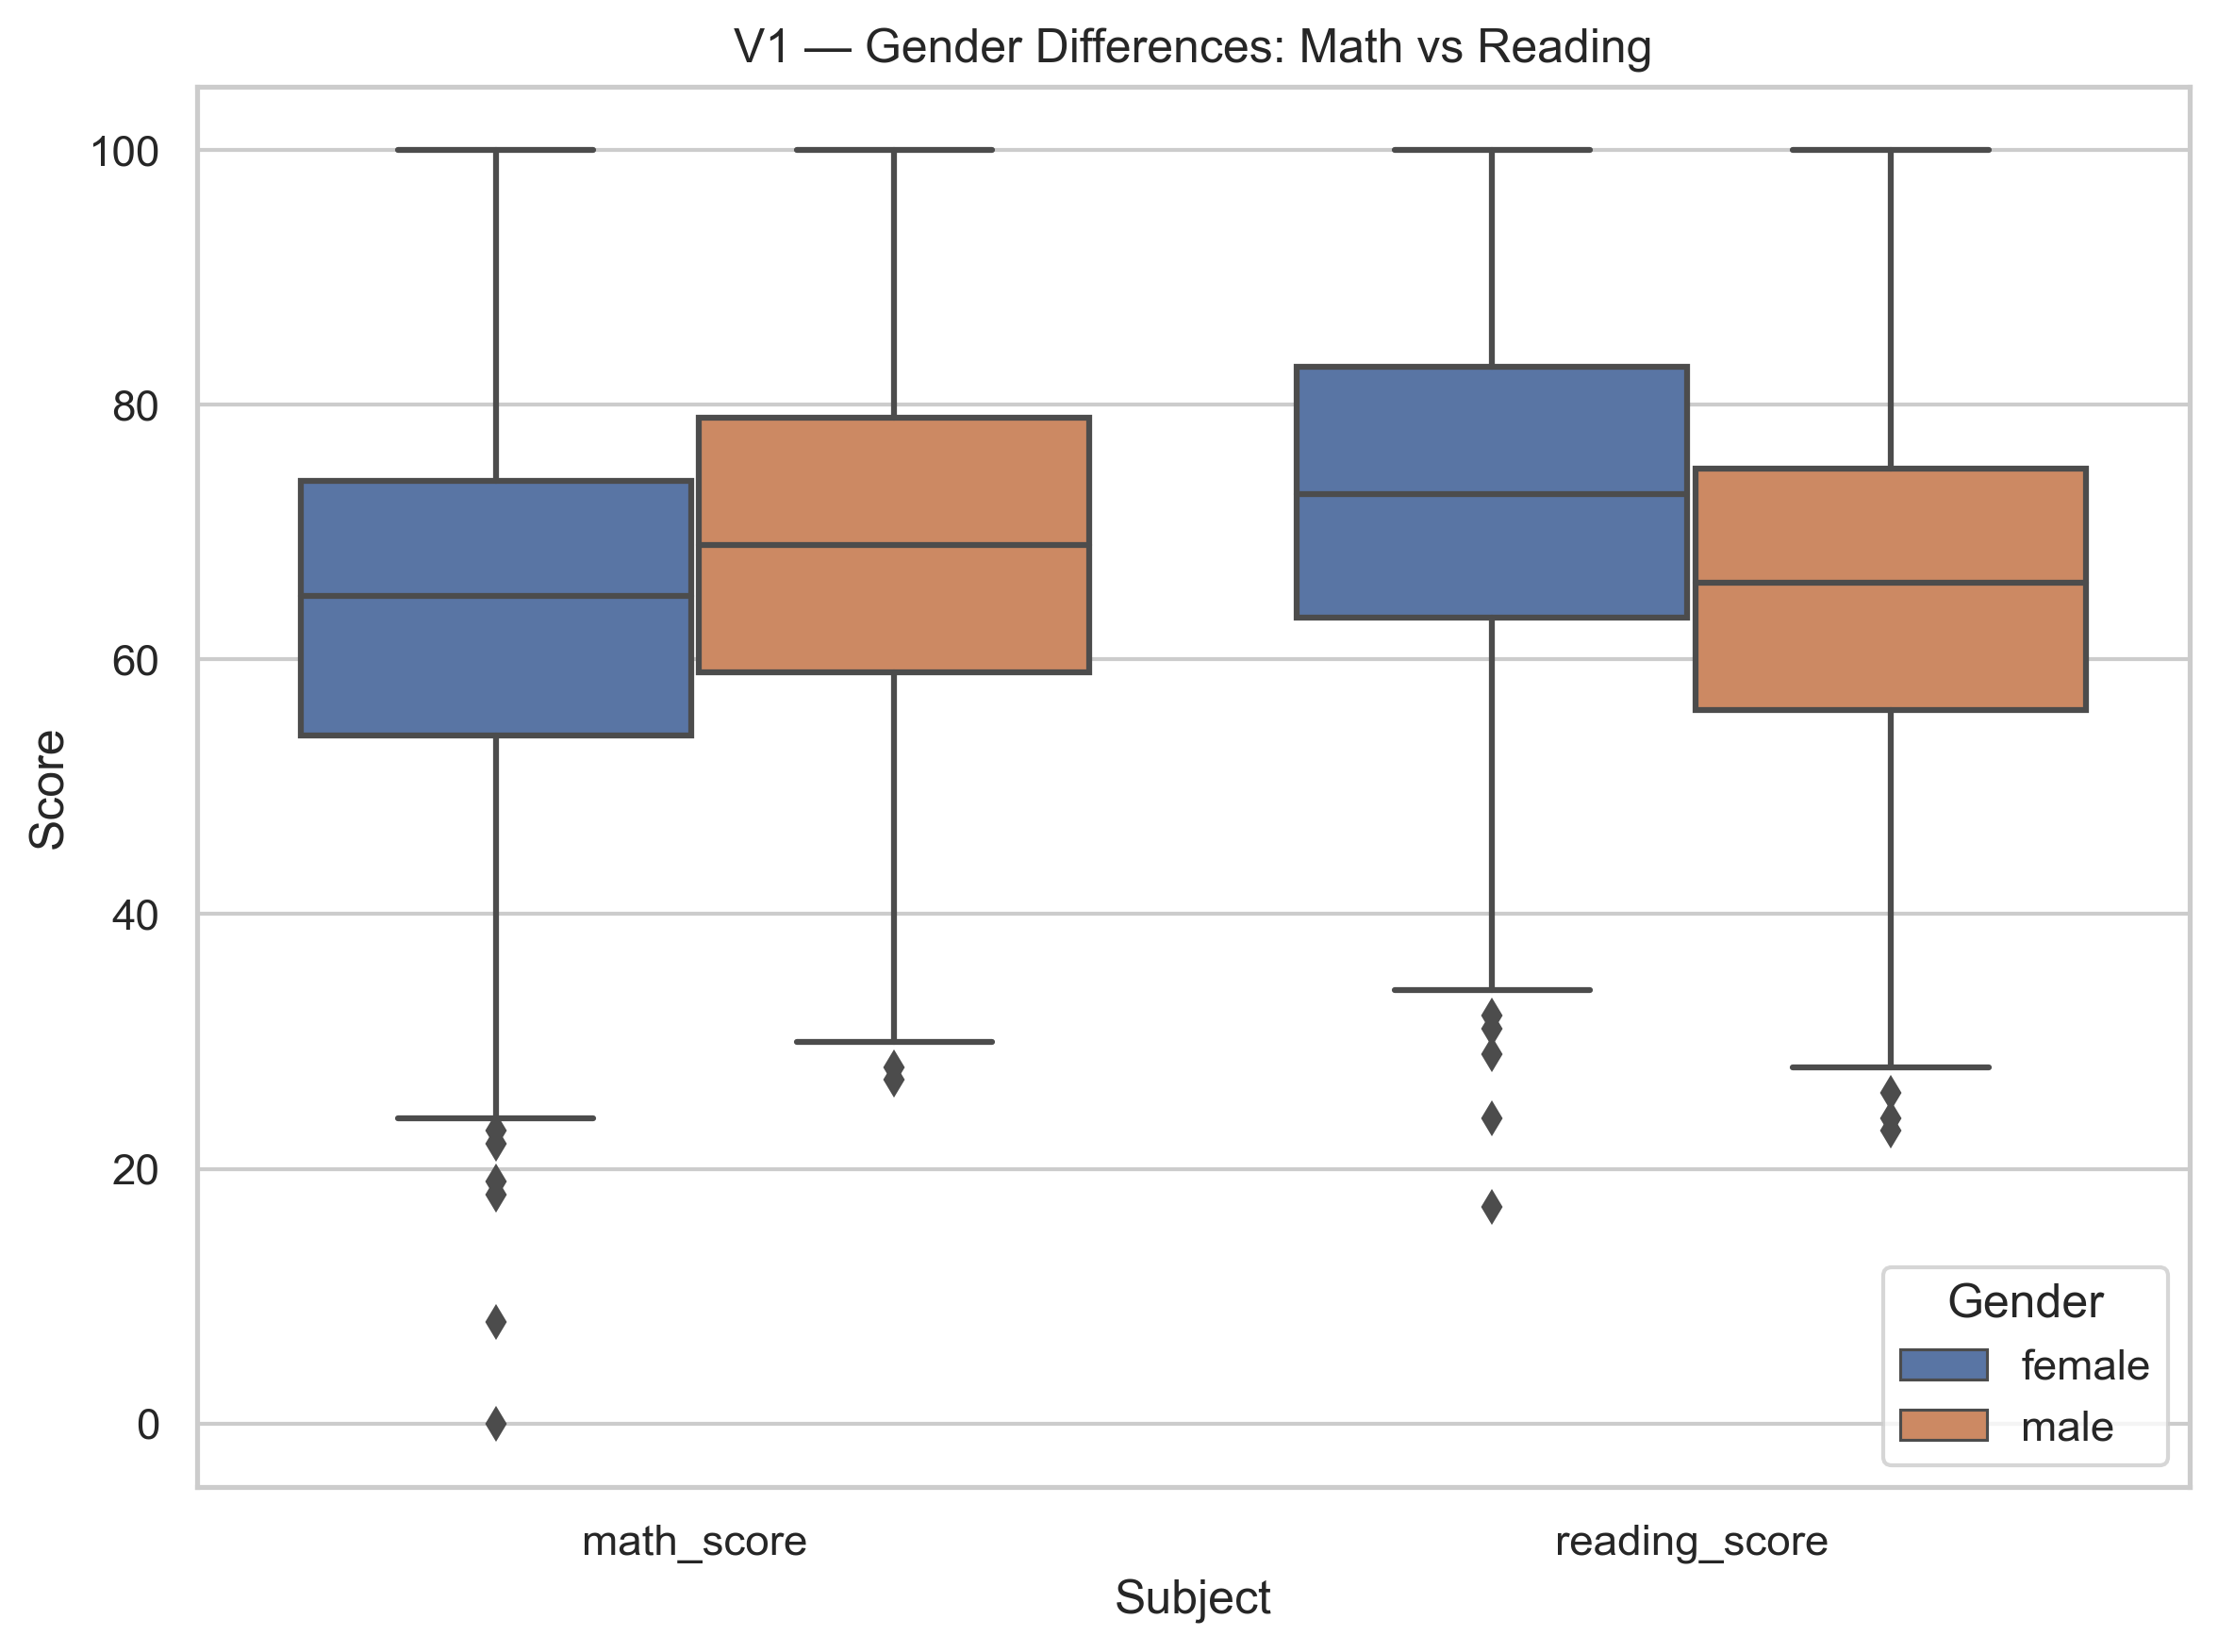

In [5]:
plt.figure(figsize=(8,6))
df_melt = df.melt(id_vars="gender", value_vars=["math_score","reading_score"],
                  var_name="subject", value_name="score")
sns.boxplot(data=df_melt, x="subject", y="score", hue="gender")
plt.title("V1 — Gender Differences: Math vs Reading")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig("V1_gender_boxplots.png", dpi=300)
plt.show()


V2: Test prep impact on math

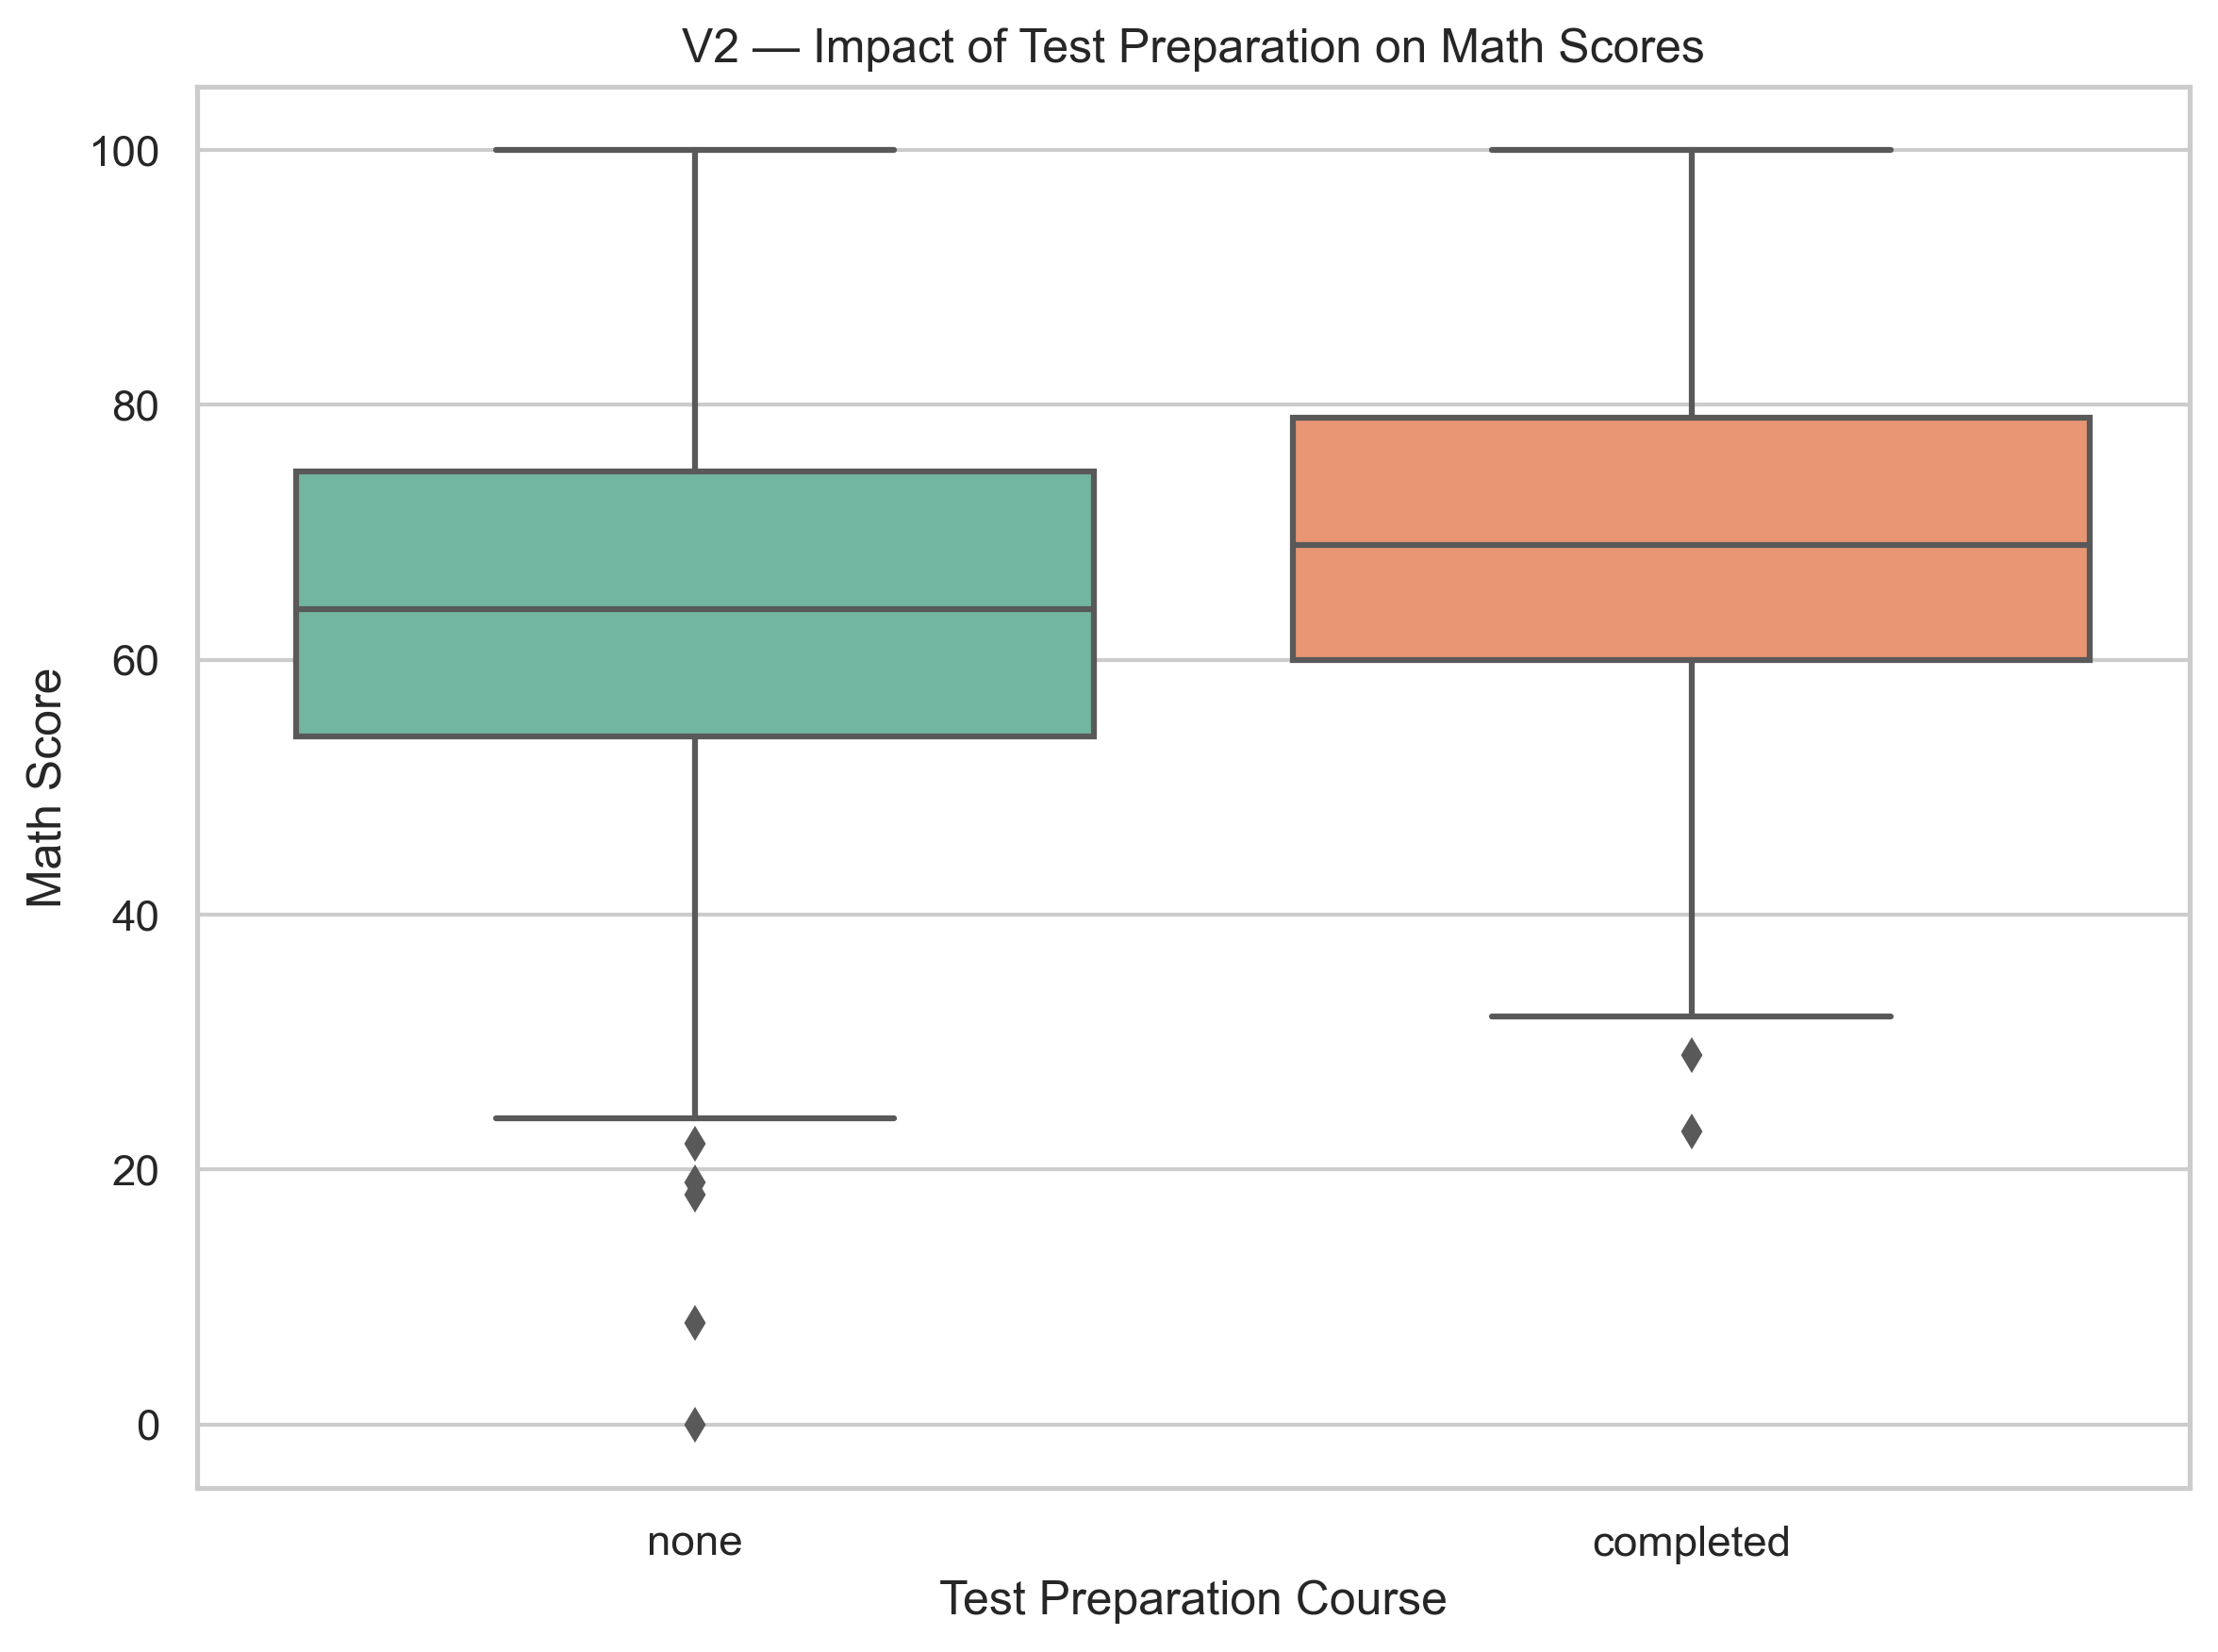

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="test_preparation_course", y="math_score", palette="Set2")
plt.title("V2 — Impact of Test Preparation on Math Scores")
plt.xlabel("Test Preparation Course")
plt.ylabel("Math Score")
plt.tight_layout()
plt.savefig("V2_testprep_math.png", dpi=300)
plt.show()

V3: Lunch type and average performance

C:\Users\hp\AppData\Local\Temp\ipykernel_14180\1104548421.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="lunch", y="overall_avg", ci=None, palette="pastel")


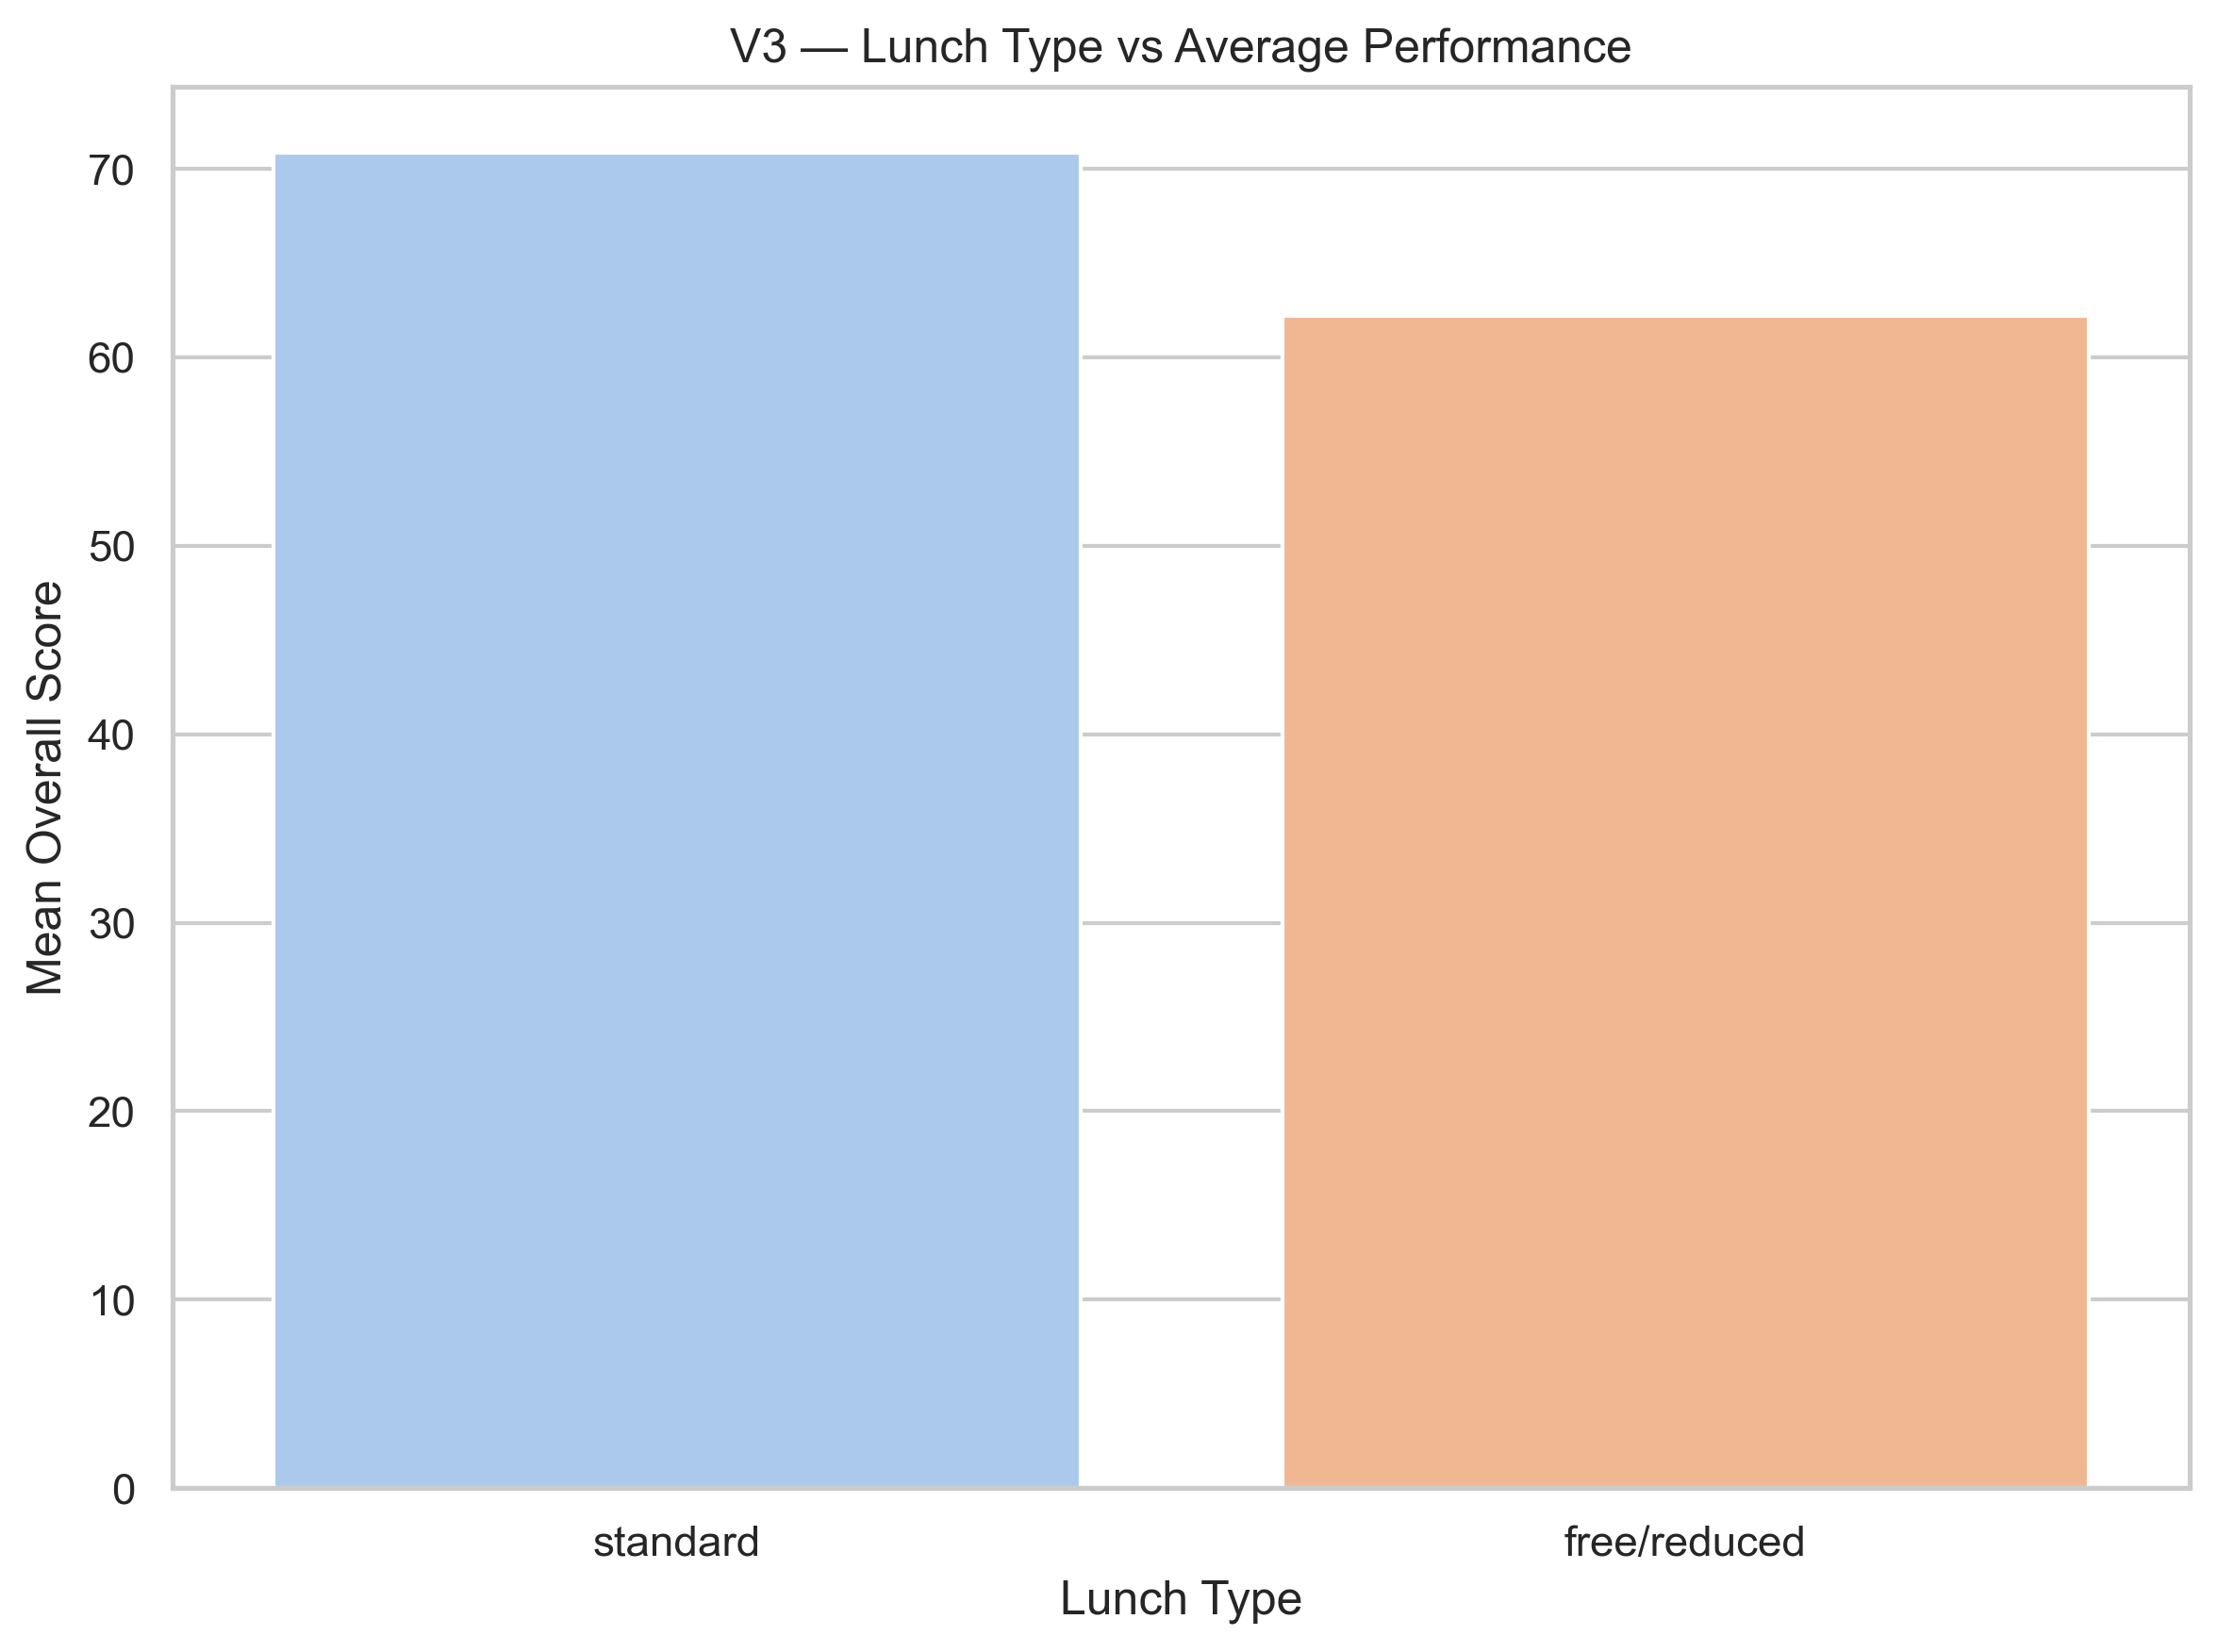

In [7]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="lunch", y="overall_avg", ci=None, palette="pastel")
plt.title("V3 — Lunch Type vs Average Performance")
plt.xlabel("Lunch Type")
plt.ylabel("Mean Overall Score")
plt.tight_layout()
plt.savefig("V3_lunch_avg.png", dpi=300)
plt.show()

V4: Subject correlations

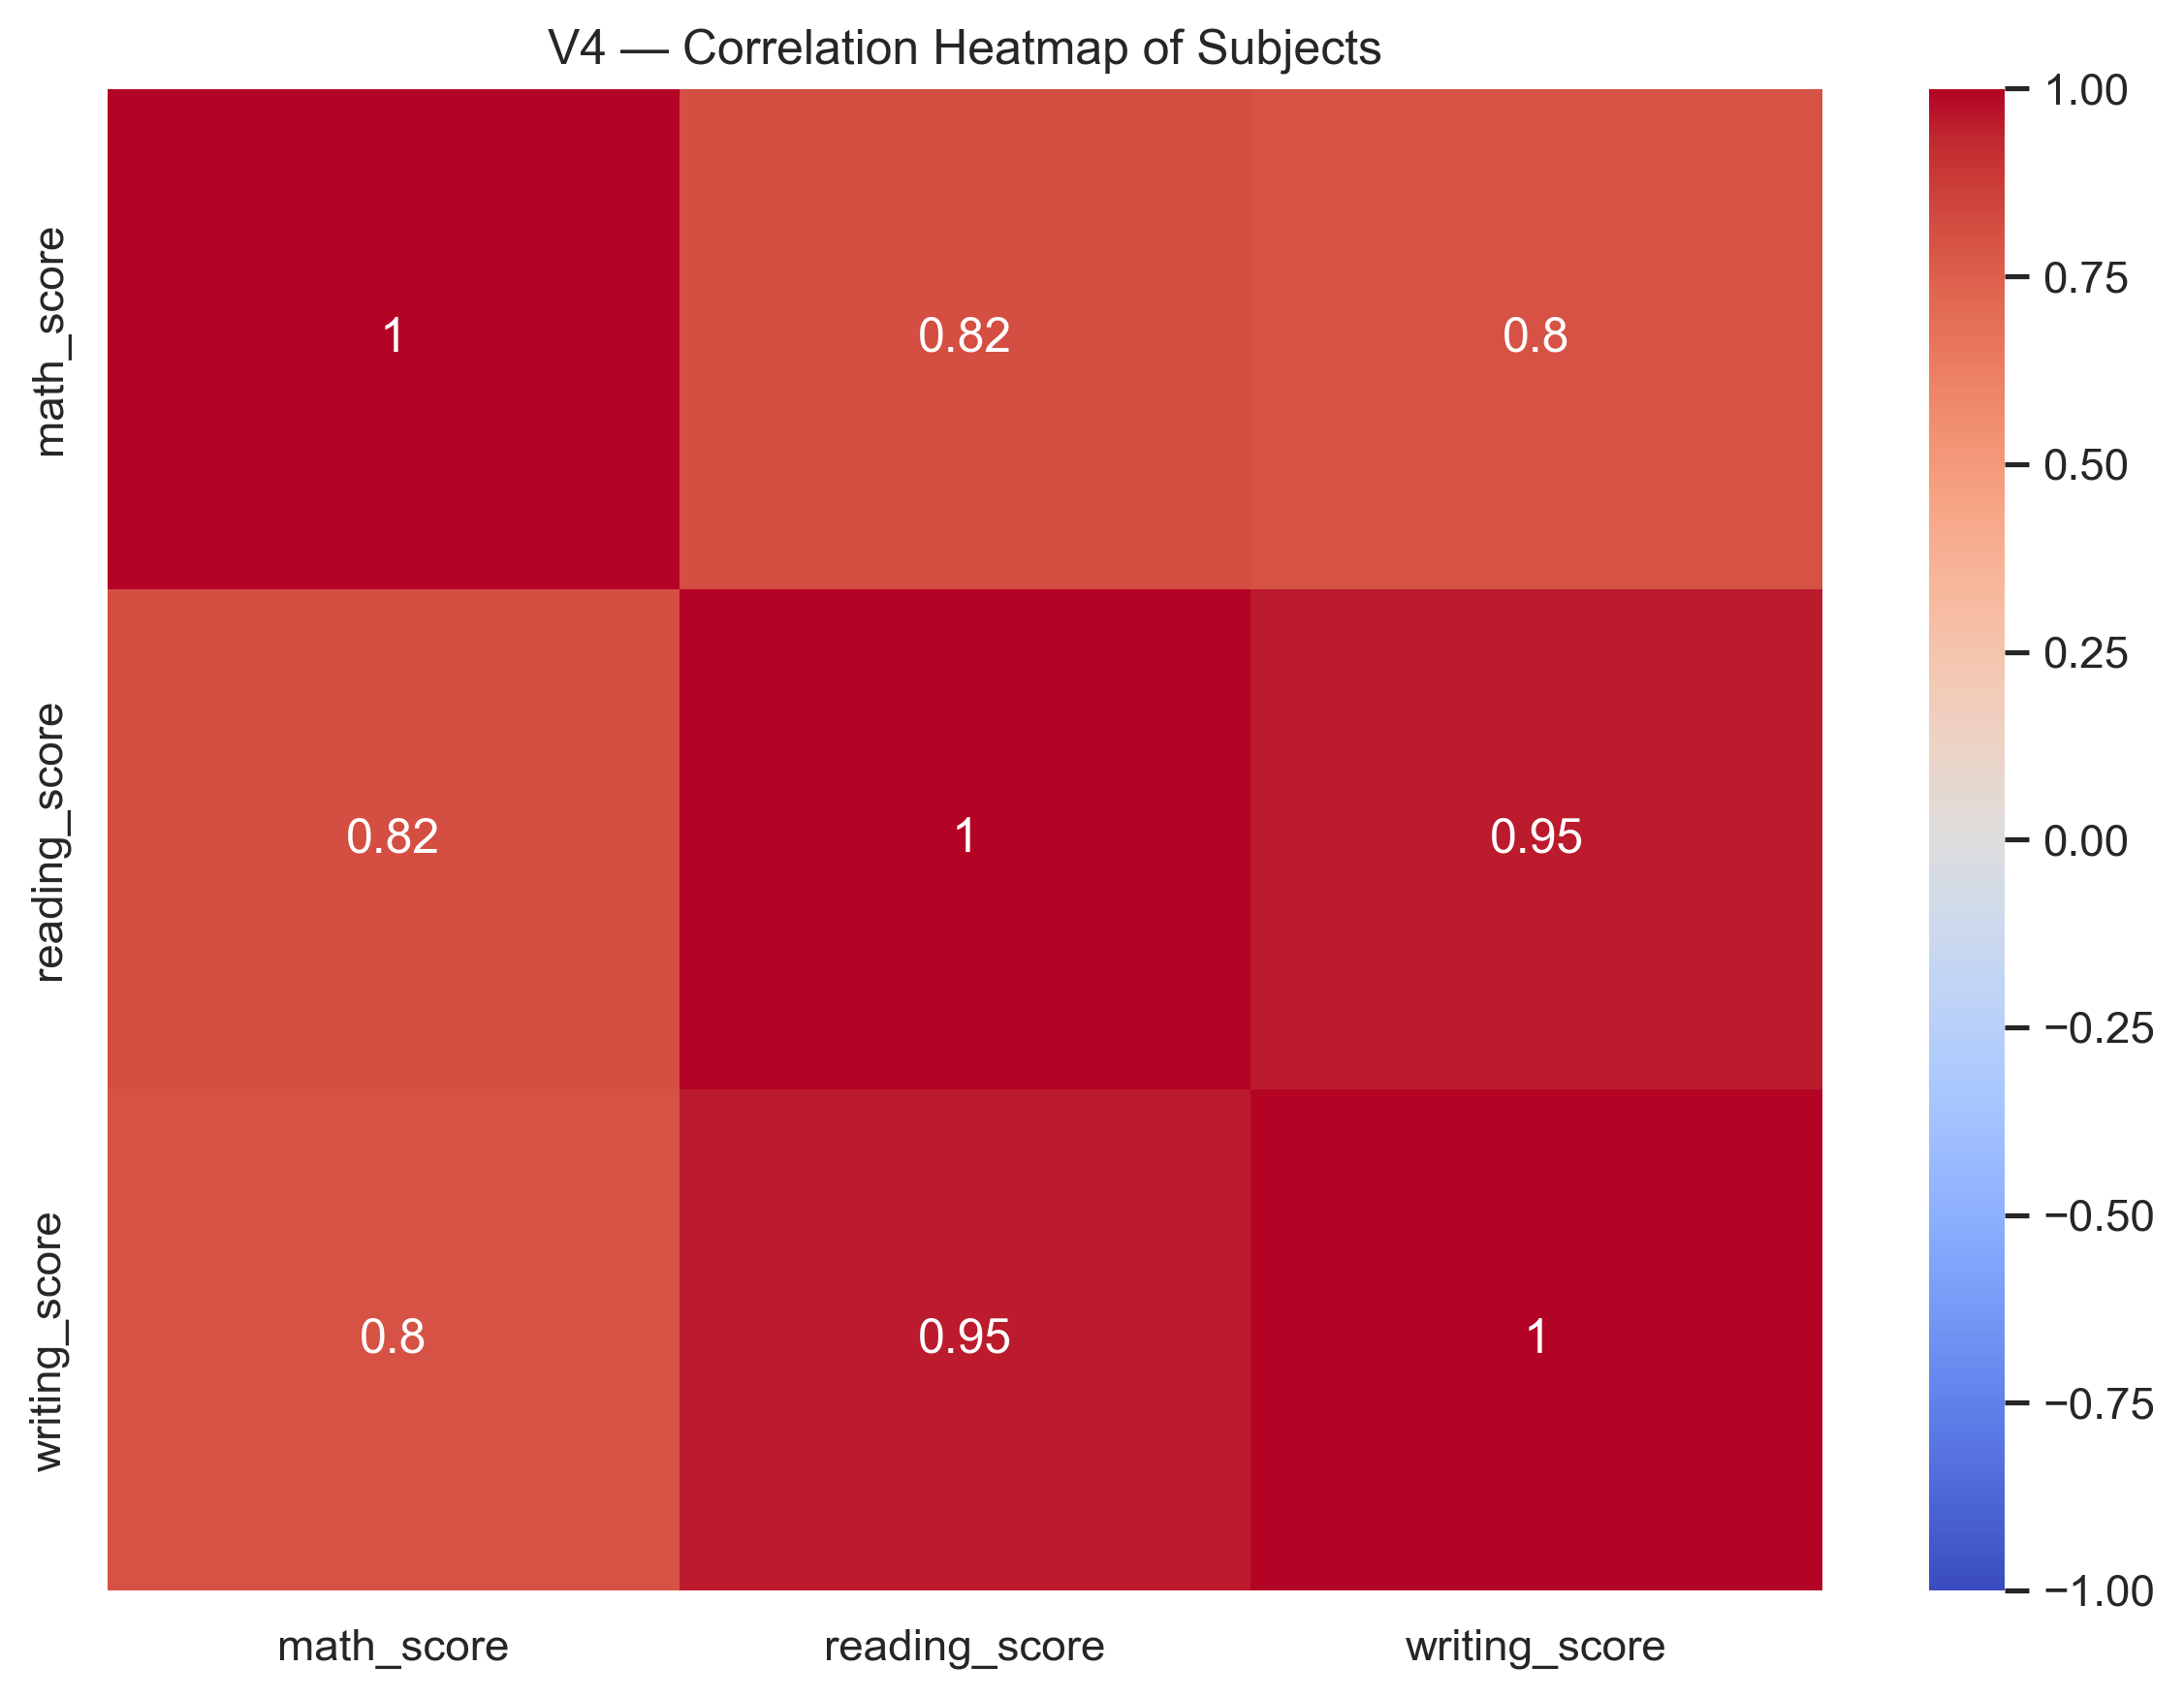

In [8]:
plt.figure(figsize=(8,6))
corr = df[["math_score","reading_score","writing_score"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("V4 — Correlation Heatmap of Subjects")
plt.tight_layout()
plt.savefig("V4_correlation_heatmap.png", dpi=300)
plt.show()

V5: Math vs Reading with trend lines by test prep

<Figure size 2400x1800 with 0 Axes>

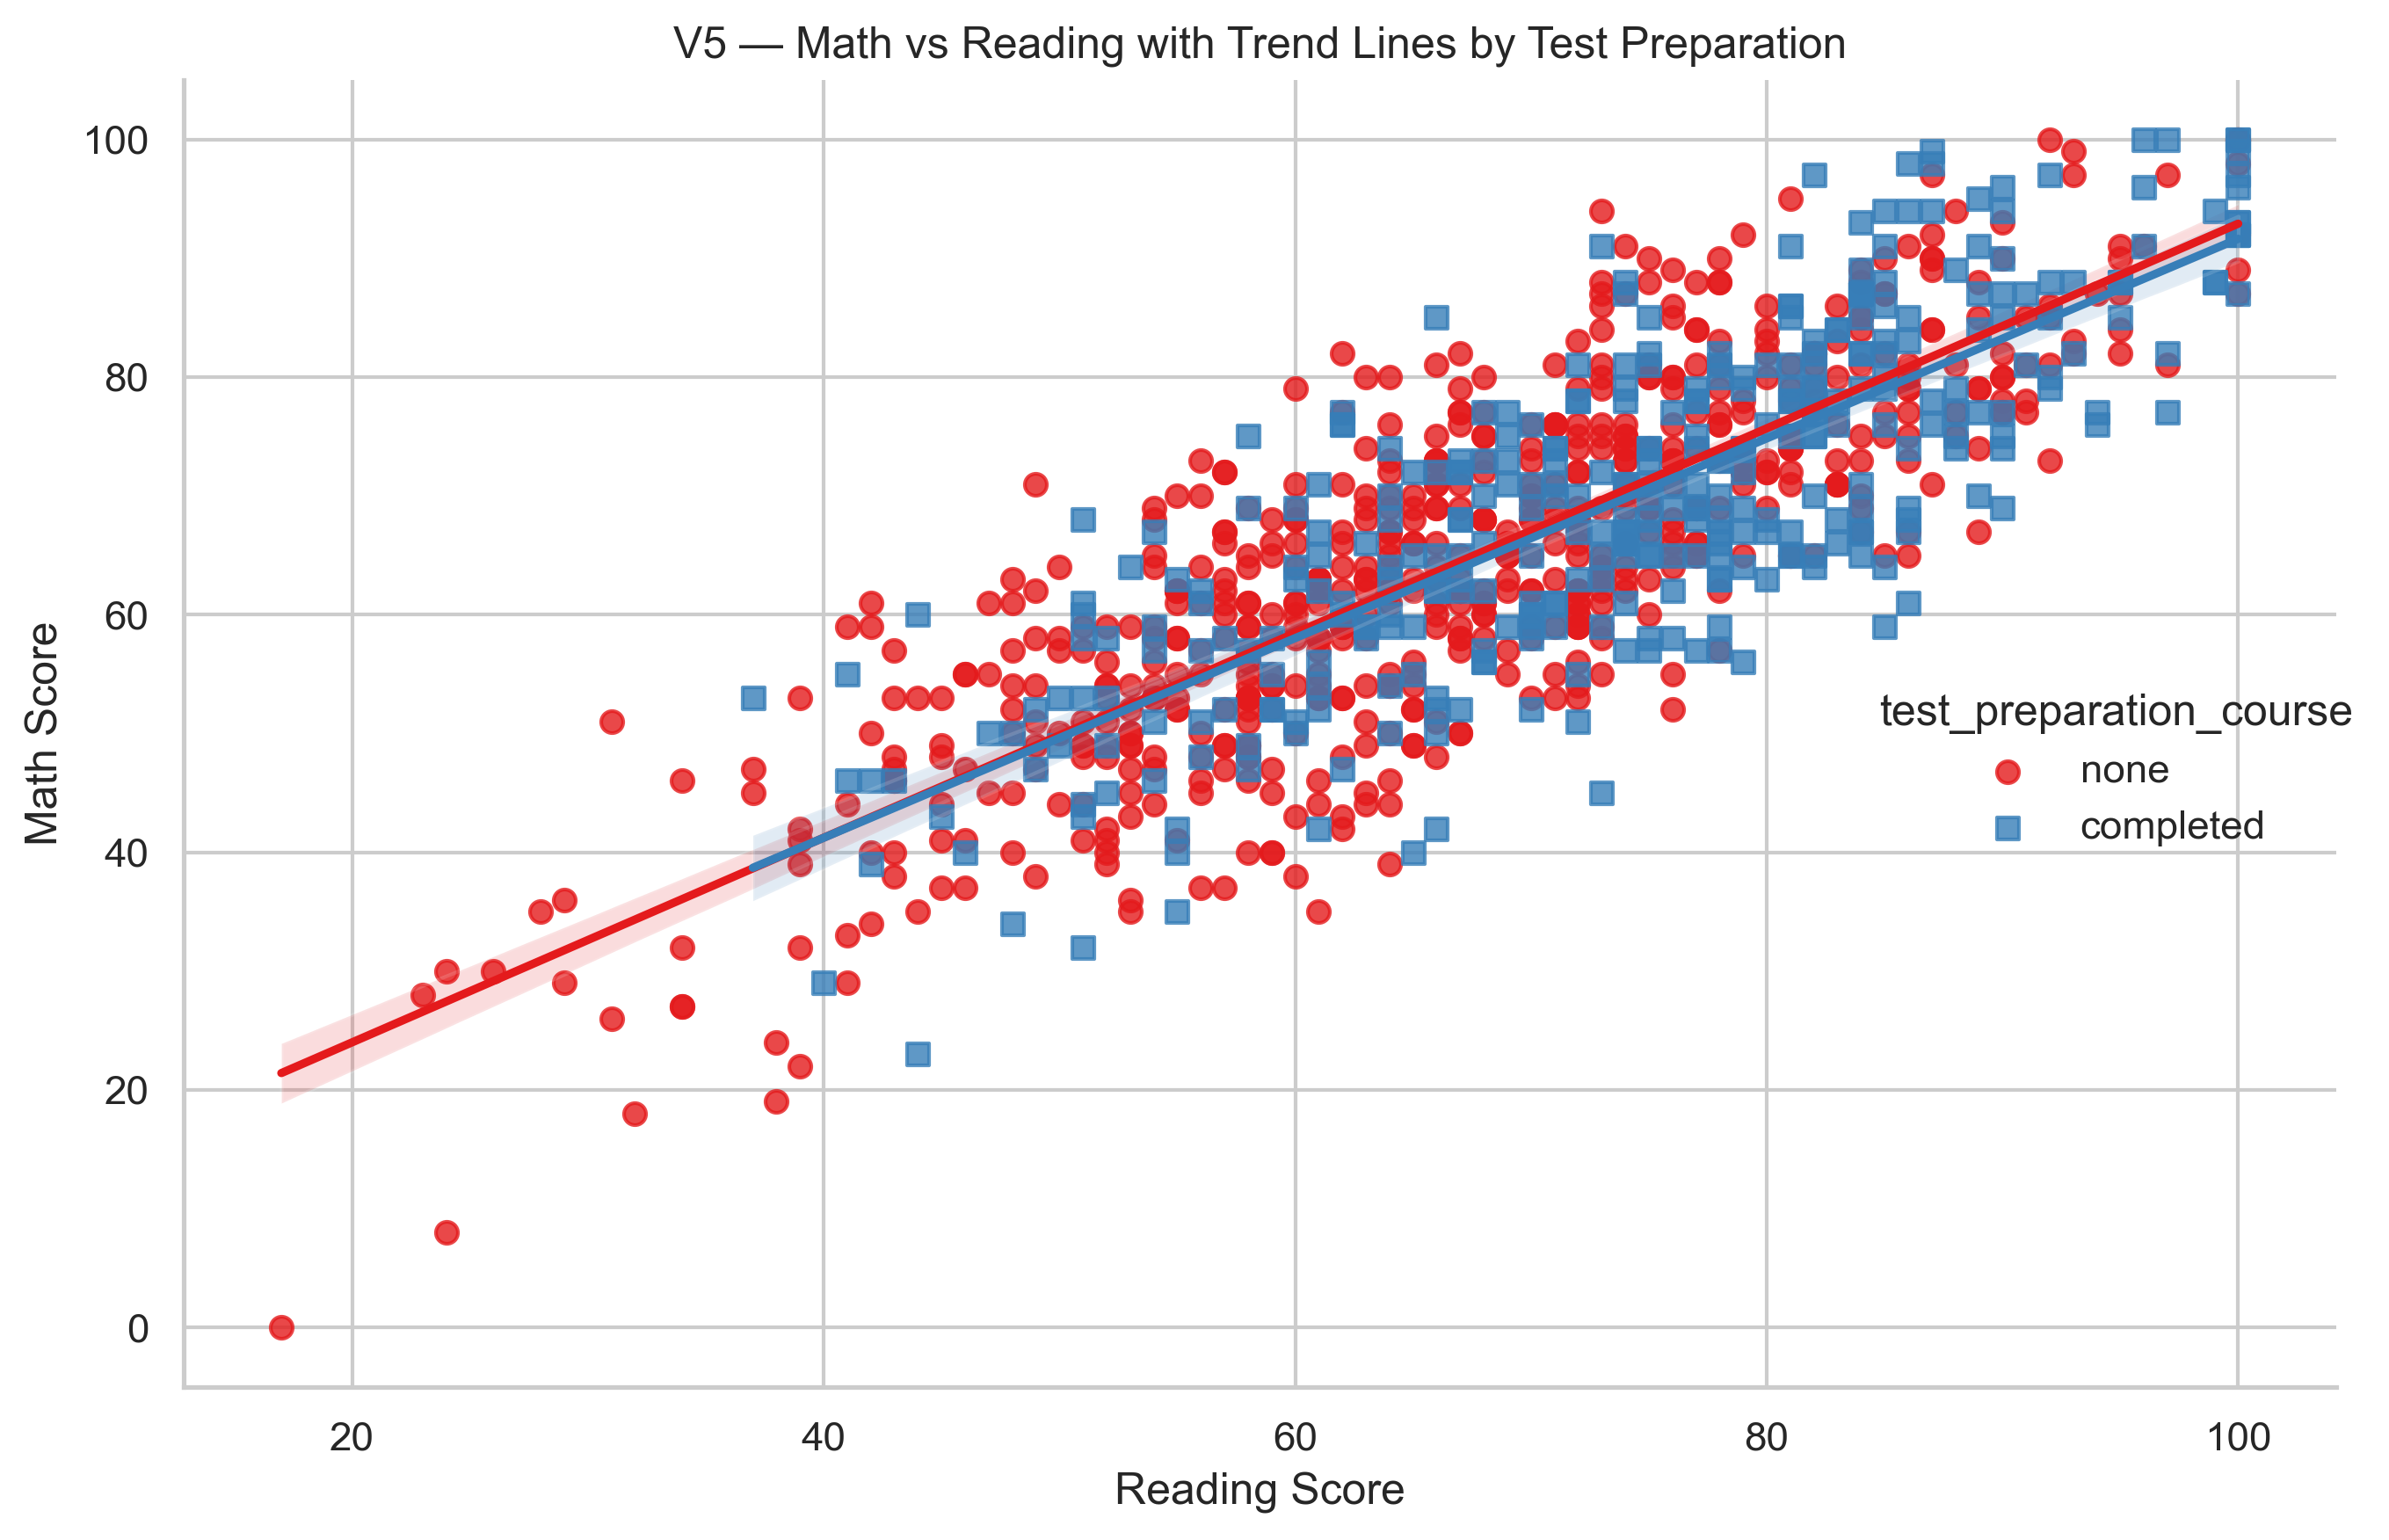

In [9]:
plt.figure(figsize=(8,6))
sns.lmplot(data=df, x="reading_score", y="math_score",
           hue="test_preparation_course", height=6, aspect=1.2,
           palette="Set1", markers=["o","s"])
plt.title("V5 — Math vs Reading with Trend Lines by Test Preparation")
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.tight_layout()
plt.savefig("V5_math_reading_trend.png", dpi=300)
plt.show()


In [ ]:
`